# Practicing EDA & ML models on World Happiness dataset

In [1]:
# Importing essential libraries

import numpy as np
import pandas as pd
import warnings # for ignoring any warnings
warnings.filterwarnings('ignore') # to ignore warnings
import seaborn as sb
sb.set(style='white', color_codes=True) # some styling parameters
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading and reading data

wh=pd.read_csv('happiness_score.csv')
wh

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
wh.dtypes # checking datatypes of given columns

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [4]:
wh.info() # checking any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
print(wh.isna().sum()) # finding any null values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


<AxesSubplot:>

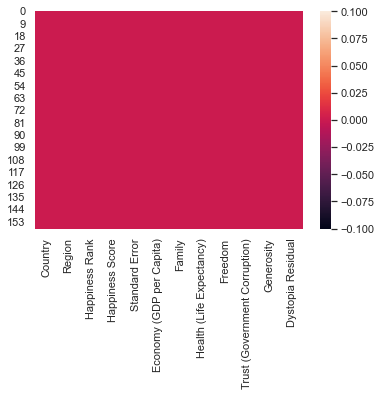

In [6]:
sb.heatmap(wh.isnull())

### Observations from above:

- No null values in the dataset

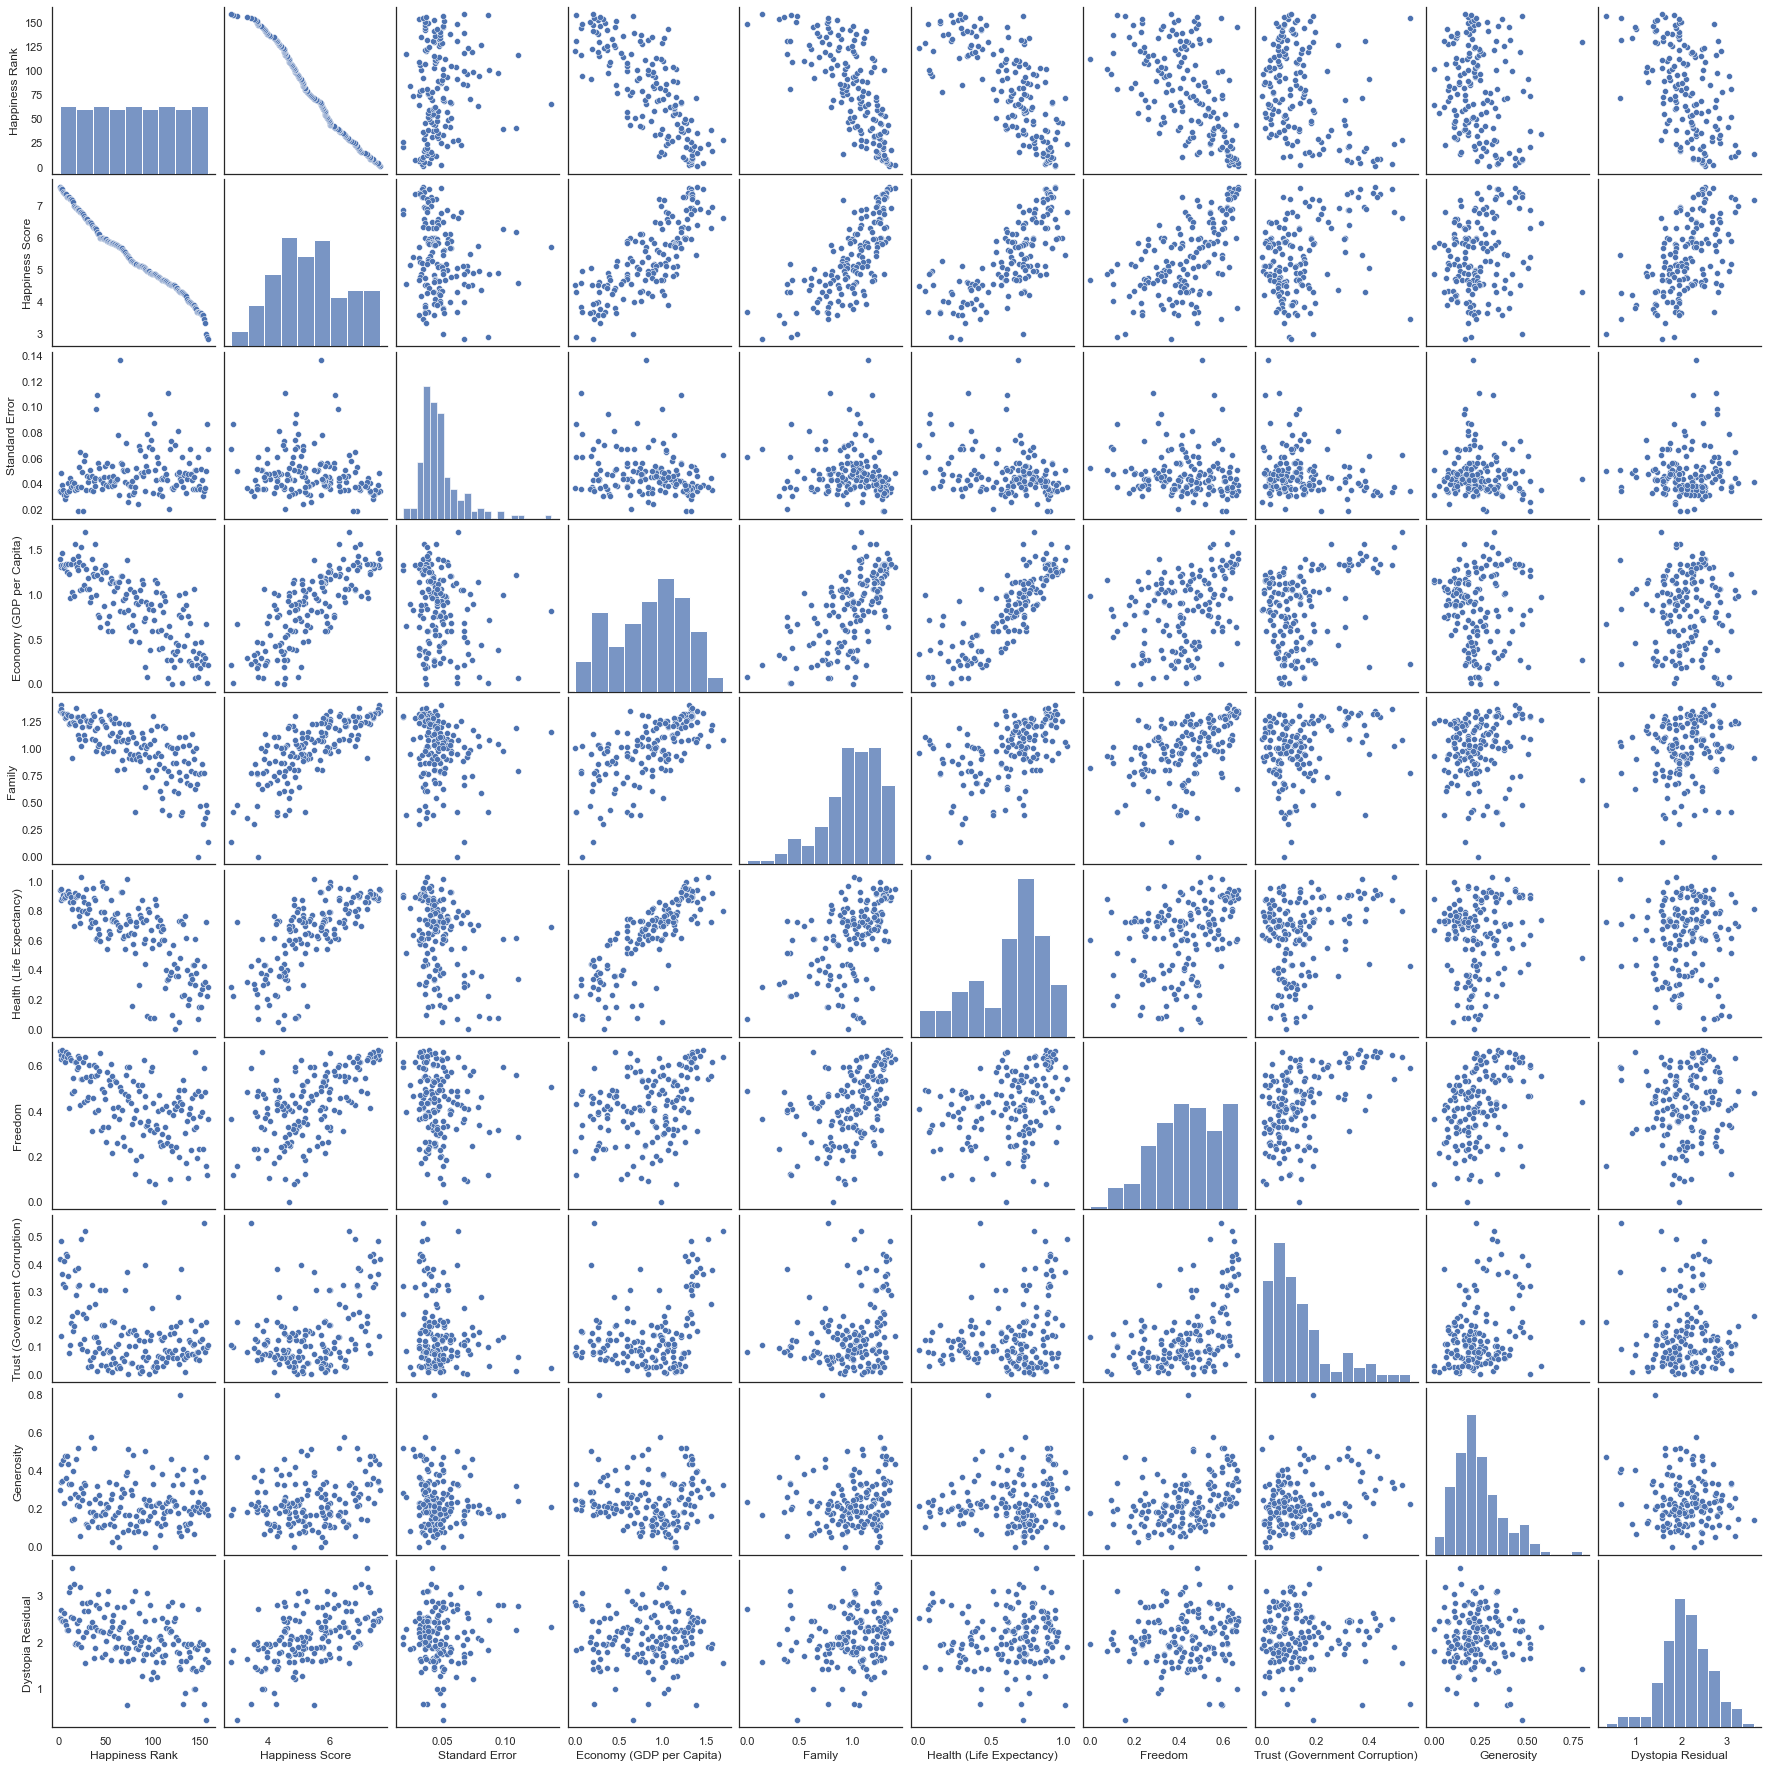

In [7]:
# Pairplot displaying all columns:

sb.pairplot(wh) # displaying DataFrame

In [8]:
wh.describe() # Statistical summary

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### Observations from above Statistical summary:

- We can say there are some outliers present in above particular columns
- Every country has +ve value from the determined six-variable factors
- Some countries has minimum value as 0. Let's find the countries with 0 in each category

In [9]:
# Checking specified rows and/or columns from the DataFrame

wh.loc[wh['Economy (GDP per Capita)']==0.0] # Checking Economy (GDP per Capita) column

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,0.0368,0.0,1.0012,0.09806,0.22605,0.07625,0.24834,2.86712


In [10]:
# Checking specified rows and/or columns from the DataFrame

wh.loc[wh['Family']==0.0] # Checking Family column

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.0785,0.0,0.06699,0.48879,0.08289,0.23835,2.7223


In [11]:
# Checking specified rows and/or columns from the DataFrame

wh.loc[wh['Health (Life Expectancy)']==0.0] # Checking Health (Life Expectancy) column

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
122,Sierra Leone,Sub-Saharan Africa,123,4.507,0.07068,0.33024,0.95571,0.0,0.4084,0.08786,0.21488,2.51009


In [12]:
# Checking specified rows and/or columns from the DataFrame

wh.loc[wh['Freedom']==0.0] # Checking Freedom column

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335


In [13]:
# Checking specified rows and/or columns from the DataFrame

wh.loc[wh['Trust (Government Corruption)']==0.0] # Checking Trust (Government Corruption) column

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.0,0.51535,1.86399


In [14]:
# Checking specified rows and/or columns from the DataFrame

wh.loc[wh['Generosity']==0.0] # Checking Generosity column

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
101,Greece,Western Europe,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0.0,1.80101


### Observations from above Minimum value (0) in each country (category-wise)

- i. Economy (GDP per Capita): **_Congo (Kinshasa)_**
- ii. Family: **_Central African Republic_**
- iii. Health (Life Expectancy): **_Sierra Leone_**
- iv. Freedom: **_Iraq_**
- v. Trust (Government Corruption): **_Indonesia_**
- vi. Generosity: **_Greece_**

### Creating new DataFrame for EDA and Data Vizualization

In [15]:
# Checking specified rows and/or columns from the DataFrame

h_df=wh[wh.columns[3:]]
h_df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### Checking Correlation using Heatmap for each column

<AxesSubplot:>

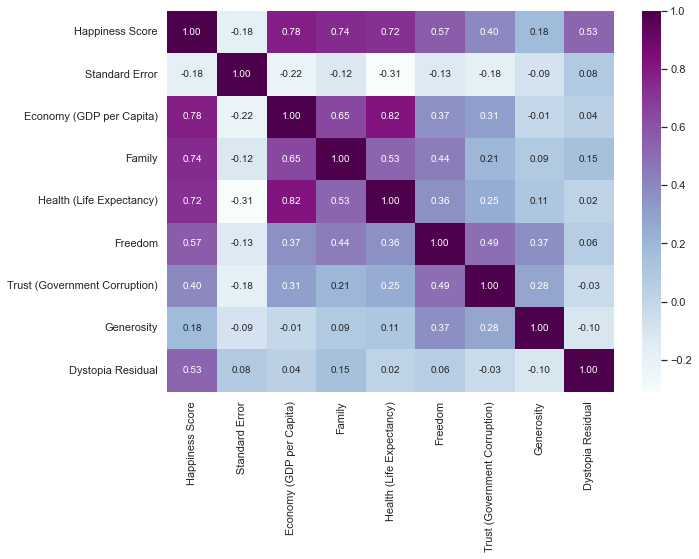

In [16]:
# Heatmap for expressing Correlation:

h_dfcor=h_df.corr()
h_dfcor
plt.figure(figsize=(10,7))
sb.heatmap(h_dfcor,cmap='BuPu',fmt=".2f",annot=True) # cmap is color map in Matplotlib; fmt is used to count until 2 decimal places; annot is to write the data value in each cell

### Observations from above Correlation data

- Heatmap is the best graphical representation of correlation between the variables/features
- Darket the color, higher the correlation
- Lighter the color, lesser the correlation
- If the correlation is **-ve** -- _correlation is decreasing with the target variable_
- If the correlation is **+ve** -- _correlation is increasing with the target variable_

- Happiness score is strongly **_+vely correlated_** with below:
    - **_Family_**
    - **_Health (Life Expectancy)_**
    - **_Freedom_**
    - **_Trust (Government Corruption)_**

- Happiness score is **_moderately correlated_** with below:
    - **_Generosity_**

- Happiness score is **_ moderately -ve correlated_** with below and has low impact on target variable:
    - **_Standard Error_**
    - **_Economy (GDP per Capita)_**
    - **_Dystopia Residual_**

- Hence, we can drop _Standard Error_, _Generosity_, _Country_, _Region_ and _Happiness Rank_ as they have relatively low impact of target variable
- We will not drop _Economy (GDP per Capita)_ as it can be considered as a factor that can be compaired with target variable

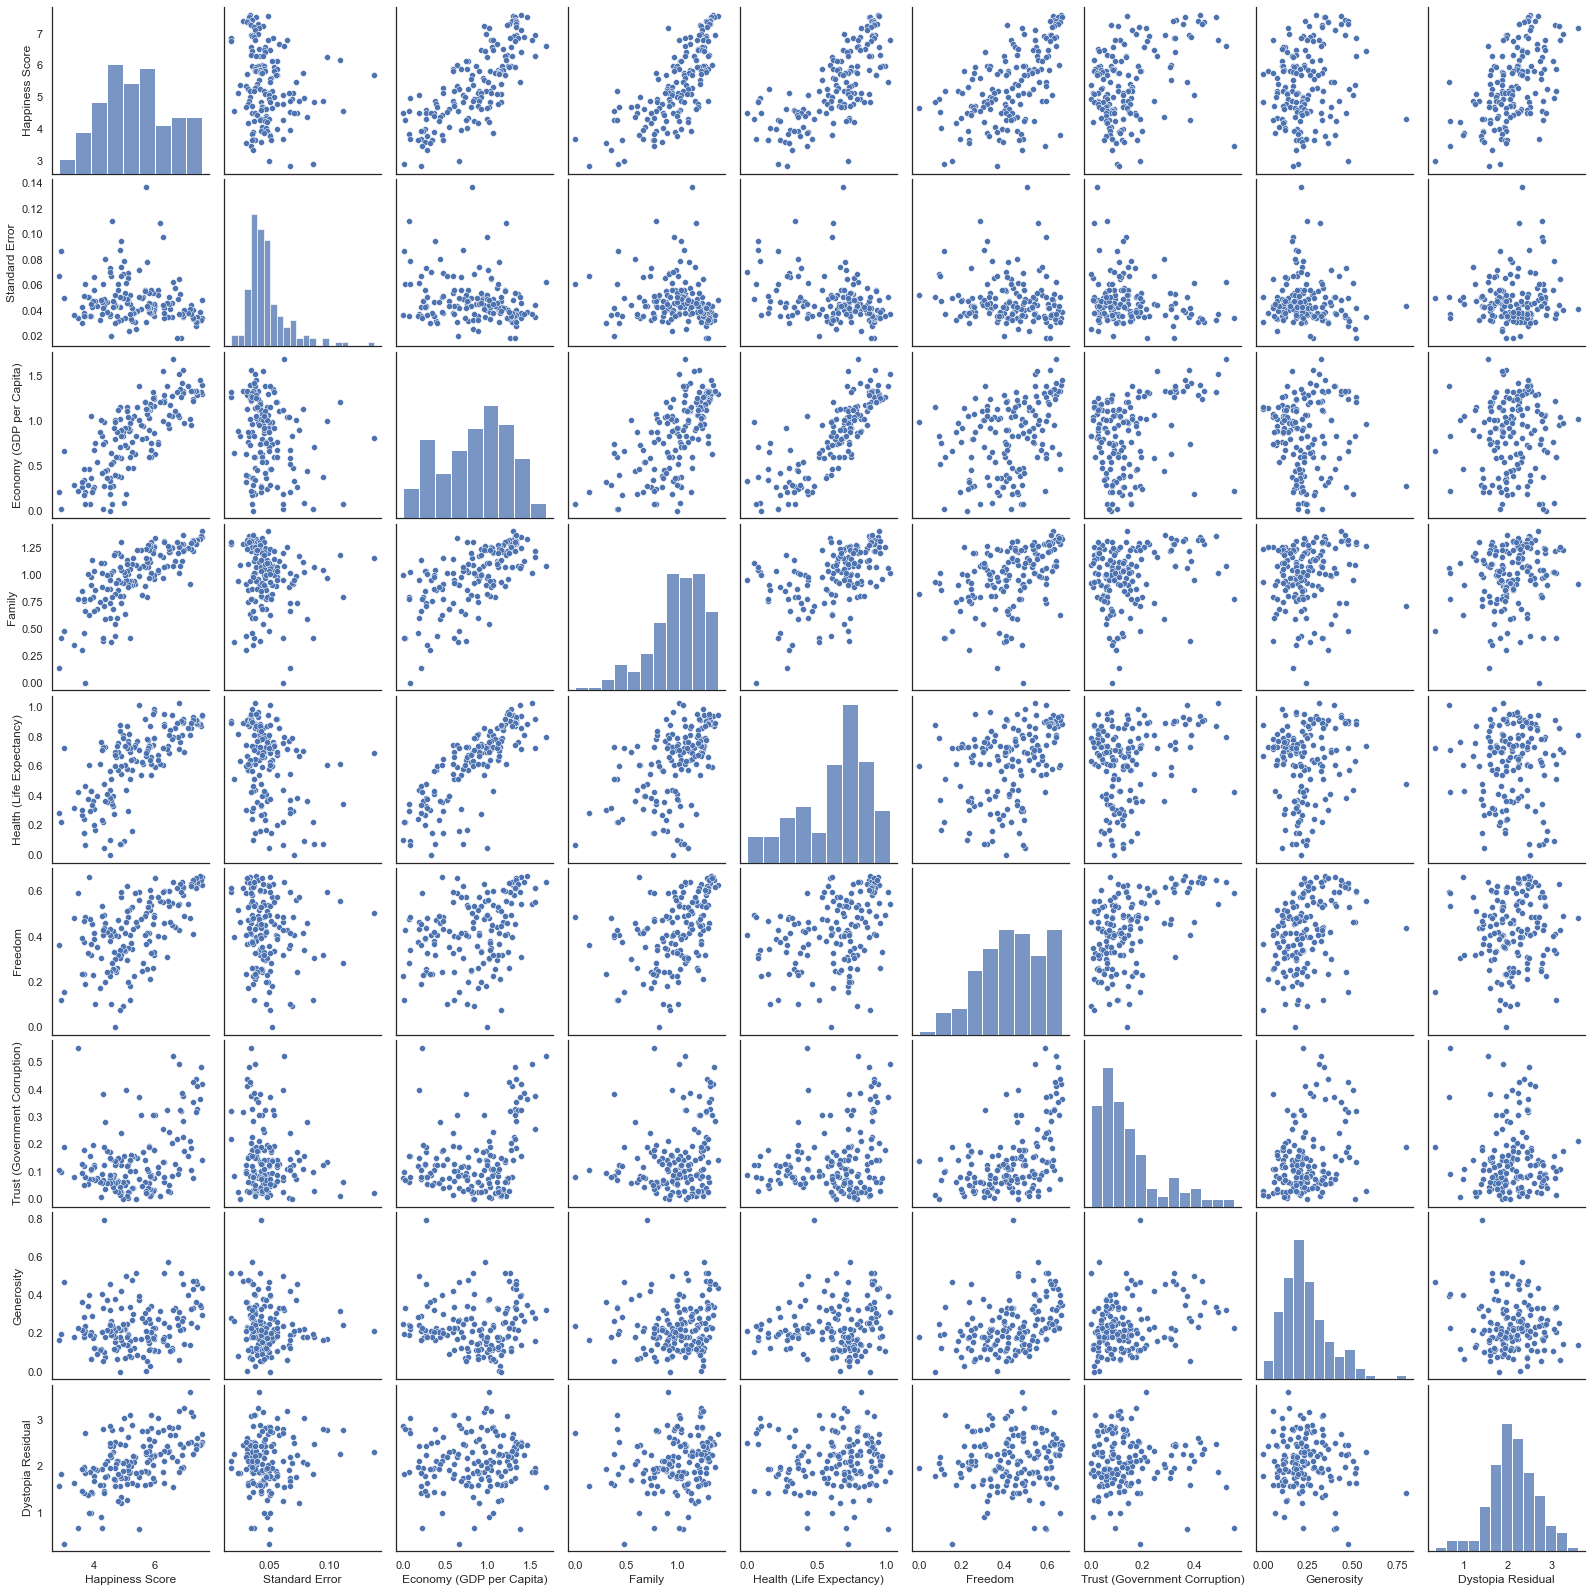

In [17]:
# Pairplot displaying all columns:

sb.pairplot(h_df) # displaying correlation DataFrame

In [18]:
# Creating new variable (wh_new) for storing the revised data (dropped column)
# Dropping Standard Error, Generosity, Country and Region

wh_new=wh.drop(['Standard Error', 'Generosity', 'Country', 'Region', 'Happiness Rank'], axis=1)
wh_new

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,2.45176
...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,1.83302


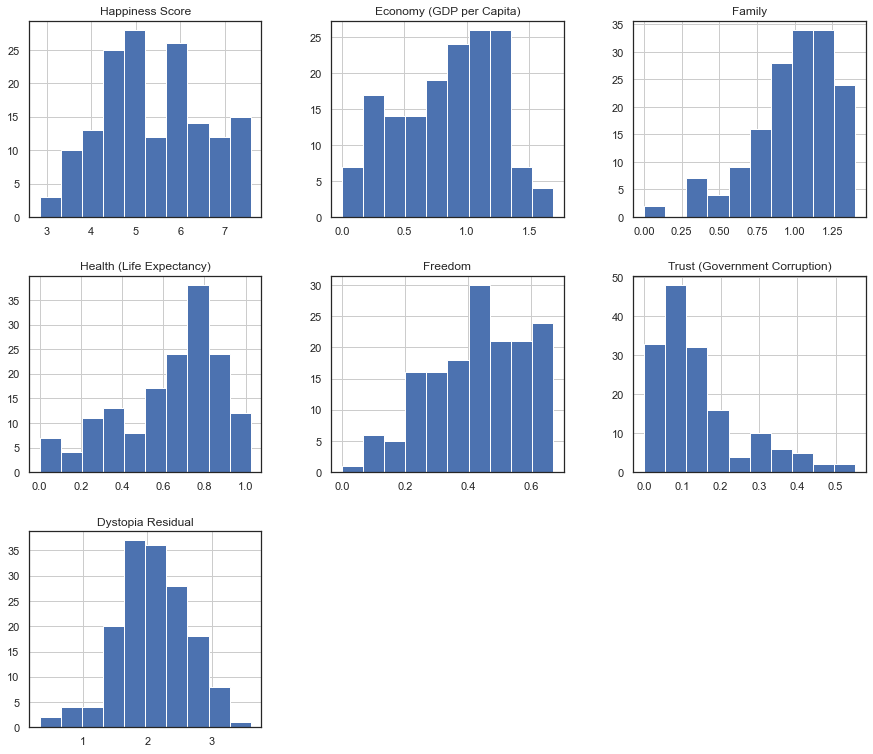

In [19]:
# Histogram displaying all columns:

wh_new.hist(figsize=(15,13)) # Using Matplotlib method; figsize is 10x5 -- width and height of the figure in inches
plt.show()

Happiness Score                      AxesSubplot(0.125,0.71587;0.168478x0.16413)
Economy (GDP per Capita)          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Family                            AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Health (Life Expectancy)          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Freedom                             AxesSubplot(0.125,0.518913;0.168478x0.16413)
Trust (Government Corruption)    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Dystopia Residual                AxesSubplot(0.529348,0.518913;0.168478x0.16413)
dtype: object

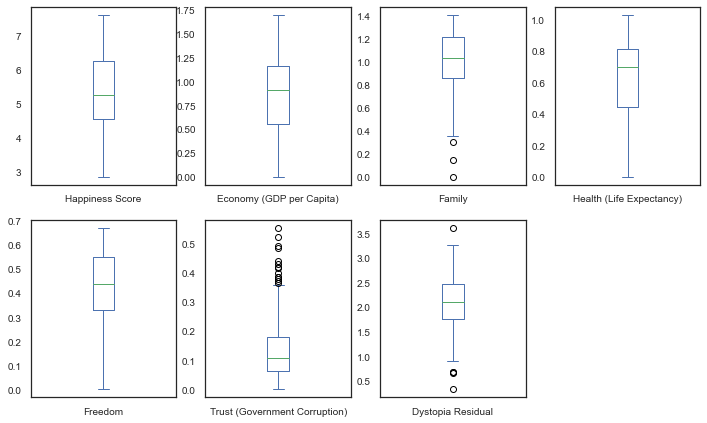

In [20]:
# Box plot displaying all columns:

wh_new.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(12,15))

In [21]:
# Plotting Skewness and Kurtosis distribution displaying all columns:

print('Printing Skewness and Kurtosis distribution for all columns')
print()
for col in list(wh_new.columns):
    print('{0}:Skewness {1:.3f} and Kurtosis {2:.3f}'.format(col,wh_new[col].skew(),wh_new[col].kurt()))

Printing Skewness and Kurtosis distribution for all columns

Happiness Score:Skewness 0.098 and Kurtosis -0.776
Economy (GDP per Capita):Skewness -0.318 and Kurtosis -0.867
Family:Skewness -1.007 and Kurtosis 0.919
Health (Life Expectancy):Skewness -0.705 and Kurtosis -0.394
Freedom:Skewness -0.413 and Kurtosis -0.461
Trust (Government Corruption):Skewness 1.385 and Kurtosis 1.385
Dystopia Residual:Skewness -0.239 and Kurtosis 0.534


Text(0, 0.5, 'Happiness Score')

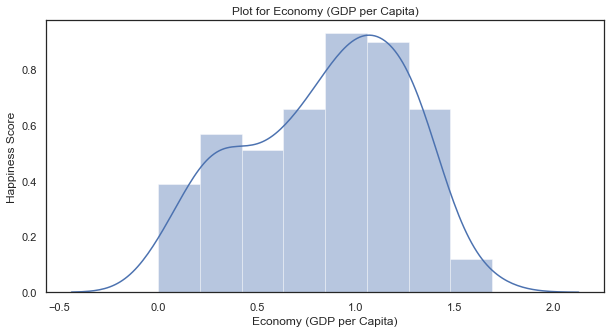

In [22]:
# Plotting GDP per Capita vs Happiness Score

plt.figure(figsize=(10,5)) # figure size is 10x5 -- width and height of the figure in inches
sb.distplot(wh_new['Economy (GDP per Capita)'])
plt.title('Plot for Economy (GDP per Capita)') # title of the chart
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')

Text(0, 0.5, 'Happiness Score')

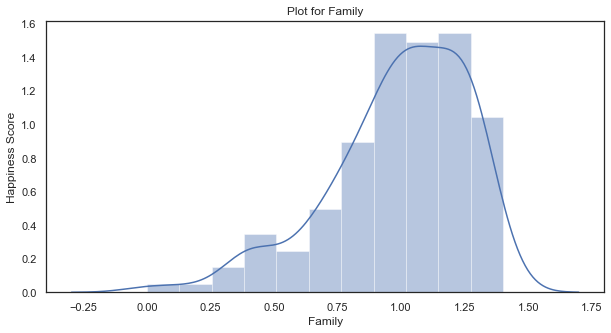

In [23]:
# Plotting Family vs Happiness Score

plt.figure(figsize=(10,5)) # figure size is 10x5 -- width and height of the figure in inches
sb.distplot(wh_new['Family'])
plt.title('Plot for Family') # title of the chart
plt.xlabel('Family')
plt.ylabel('Happiness Score')

Text(0, 0.5, 'Happiness Score')

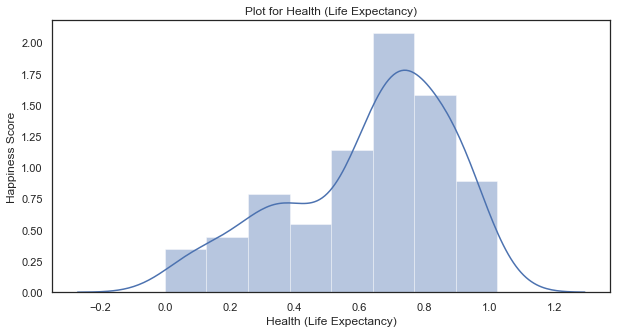

In [24]:
# Plotting Health (Life Expectancy) vs Happiness Score

plt.figure(figsize=(10,5)) # figure size is 10x5 -- width and height of the figure in inches
sb.distplot(wh_new['Health (Life Expectancy)'])
plt.title('Plot for Health (Life Expectancy)') # title of the chart
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')

Text(0, 0.5, 'Happiness Score')

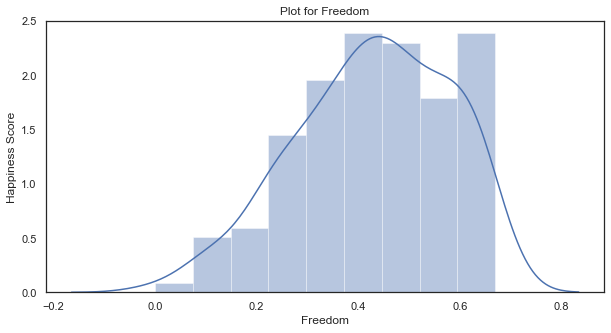

In [25]:
# Plotting Freedom vs Happiness Score

plt.figure(figsize=(10,5)) # figure size is 10x5 -- width and height of the figure in inches
sb.distplot(wh_new['Freedom'])
plt.title('Plot for Freedom') # title of the chart
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')

Text(0, 0.5, 'Happiness Score')

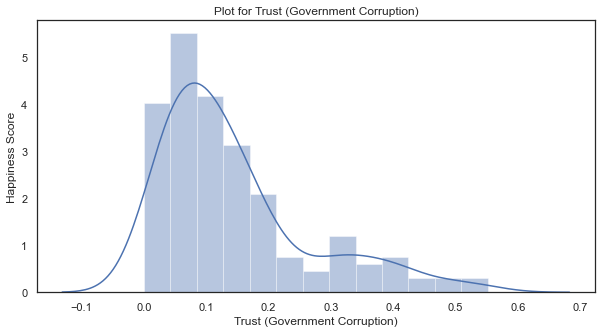

In [26]:
# Plotting Trust (Government Corruption) vs Happiness Score

plt.figure(figsize=(10,5)) # figure size is 10x5 -- width and height of the figure in inches
sb.distplot(wh_new['Trust (Government Corruption)'])
plt.title('Plot for Trust (Government Corruption)') # title of the chart
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')

Text(0, 0.5, 'Happiness Score')

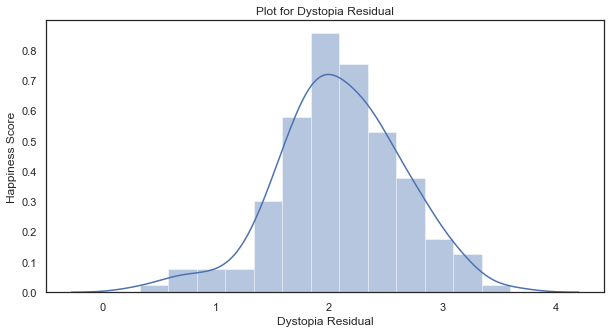

In [27]:
# Plotting Dystopia Residual vs Happiness Score

plt.figure(figsize=(10,5)) # figure size is 10x5 -- width and height of the figure in inches
sb.distplot(wh_new['Dystopia Residual'])
plt.title('Plot for Dystopia Residual') # title of the chart
plt.xlabel('Dystopia Residual')
plt.ylabel('Happiness Score')

### Observations from above Histogram, Box plot and Skewness data

- There are some outliers present in _Family_, _Trust (Government Corruption)_ and _Dystopia Residual_
- The data in _Trust (Government Corruption)_ is right skewed / +vely skewed with few outliers
- The data in _Family_, _Health (Life Expectancy)_ and _Freedom_ are left skewed / -vely skewed few outliers in _Family_
- The data in _Dystopia Residual_ is normally distributed with few outliers

In [28]:
# We will import zscore from Scipy

from scipy.stats import zscore
z=np.abs(zscore(wh_new))
print(np.where(z>3)) # displaying zscore after 3rd Std Dev

(array([ 27, 147, 153, 155, 157], dtype=int64), array([5, 2, 5, 6, 2], dtype=int64))


In [29]:
# Creating new variable (wh_n) for storing the revised data (dropped column)

wh_n=wh_new[(z<3).all(axis=1)]
wh_n

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,2.45176
...,...,...,...,...,...,...,...
150,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,1.41723
151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,1.46494
152,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,1.95210
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,1.63328


## Pre-processing data & Prediction using essential ML libraries

In [30]:
# Importing essentital Machine Learning libraries

!pip install scikit-learn
!pip install xgboost
from sklearn.preprocessing import LabelEncoder # importing LabelEncoder
from sklearn.preprocessing import StandardScaler # importing StandardScaler
from sklearn.linear_model import LinearRegression # importing LinearRegression
from sklearn.ensemble import RandomForestRegressor # importing RandomForestRegressor -- ensemble technique
from sklearn.tree import DecisionTreeRegressor # importing DecisionTreeRegressor
from sklearn.svm import SVR # importing SVR
import xgboost as xgb

# Now importing r2_score, MSE, MSA, accuracy_score, confusion_matrix below

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, train_test_split

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [31]:
wh_n=wh_n.apply(LabelEncoder().fit_transform)
X=wh_n.drop('Happiness Score', axis=1)
Y=wh_n["Happiness Score"]

In [32]:
Y=Y.values.reshape(-1,1)
Y.shape

(153, 1)

In [33]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X))

In [34]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
print(Y_train.shape, Y_test.shape)

(122, 1) (31, 1)


In [35]:
# %%time in Python prints the wall time for the entire cell -- remember to remove the comment as %%time don't executive without it

%%time
linear_reg=LinearRegression()
linear_reg.fit(X_train, Y_train)

CPU times: total: 0 ns
Wall time: 6.5 ms


LinearRegression()

In [36]:
pred=linear_reg.predict(X_test)
pred

array([[ 62.96794406],
       [ 75.94349582],
       [ 33.6381952 ],
       [ 46.83561108],
       [128.69486621],
       [ 45.02157898],
       [ 64.32519318],
       [ 62.22023418],
       [143.66094073],
       [125.02997786],
       [132.41952837],
       [155.14909431],
       [148.82327393],
       [ 94.48492359],
       [ 89.56318483],
       [ 65.61961002],
       [ 39.61636805],
       [ 19.53695145],
       [ 83.61025292],
       [ 55.43410518],
       [ 68.78578846],
       [ 25.6838114 ],
       [117.02374782],
       [ 80.98157171],
       [ 94.77870714],
       [122.28367218],
       [122.89393189],
       [ 30.73200825],
       [ 21.75181049],
       [114.88987999],
       [ 47.65036194]])

In [37]:
linear_reg_accuracy=round(linear_reg.score(X_train, Y_train)*100)
linear_reg_accuracy

95

In [38]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, pred)))
print('R2 score:', r2_score(Y_test, pred))

Mean Absolute Error: 7.0630892348454735
Mean Squared Error: 76.48133836141025
Root Mean Squared Error: 8.745360962327984
R2 score: 0.9507891524017269


In [39]:
# Importing Pickle library

import pickle

In [40]:
filename='world_happiness.pkl'
pickle.dump(linear_reg,open(filename,'wb'))